In [324]:
import matplotlib.pyplot as plt
from pathlib import Path
from itertools import product
from math import sqrt

In [325]:
class Dummy_obj:
    def __init__(self, onnx, vnnlib, n_splits, ot, st, bt, res_o, res_s, res_b):
        self.onnx, self.vnnlib, self.n_splits = onnx, vnnlib, int(n_splits)
        self.ot, self.st, self.bt = float(ot), float(st), float(bt)
        self.res_o, self.res_s, self.res_b = res_o, res_s, res_b
    def __str__(self):
        return f"Instance: {self.onnx}, {self.vnnlib}, {self.n_splits}, {self.res_o}, {self.res_b}, {self.res_s}, {self.ot}, {self.bt}, {self.st}"

In [326]:
def load_csv(file):
    with open(file) as f:
        f.readline()
        rows = []
        for l in f:
#             onnx,vnnlib,strategy,mask,n_splits,original_r,original_t,splitted_r,splitted_t,baseline_r,baseline_t
            fileds = l.strip().split(',')
#             assert len(fileds)==11
            if len(fileds)!=11:
                print(fileds)
            if fileds[4] == "SKIPPED":
                rows.append( Dummy_obj(fileds[0], fileds[1], -1, -1, -1, -1, -1, -1, -1) )
                continue
            if fileds[4] == "SPLIT_FAILED":
                rows.append( Dummy_obj(fileds[0], fileds[1], -1, -1, -1, -1, -1, -1, -1) )
                continue
            rows.append( Dummy_obj(fileds[0], fileds[1], fileds[4], 
                                   fileds[6], fileds[8], fileds[10], 
                                   fileds[5], fileds[7], fileds[9]) )
    return (file.stem, rows)
            

In [327]:
exp2_path = Path("/Users/linhan/relusplitter/experiment/results/exp2")

In [328]:
results = []
for f in exp2_path.iterdir():
    if f.suffix != ".csv":
        continue
    results.append(load_csv(f))
    
    

['mnist-net_256x2', 'prop_12_0.03', 'random', 'stable+', 'SPLIT_FAILED', 'sat', '167.048', '-1', '-1', '-1', '-1', '']
['mnist-net_256x2', 'prop_0_0.05', 'random', 'stable+', 'SPLIT_FAILED', 'sat', '17.349', '-1', '-1', '-1', '-1', '']
['mnist-net_256x2', 'prop_1_0.05', 'random', 'stable+', 'SPLIT_FAILED', 'sat', '17.677', '-1', '-1', '-1', '-1', '']
['mnist-net_256x2', 'prop_2_0.05', 'random', 'stable+', 'SPLIT_FAILED', 'sat', '17.198', '-1', '-1', '-1', '-1', '']
['mnist-net_256x2', 'prop_8_0.05', 'random', 'stable+', 'SPLIT_FAILED', 'sat', '17.132', '-1', '-1', '-1', '-1', '']
['mnist-net_256x2', 'prop_12_0.05', 'random', 'stable+', 'SPLIT_FAILED', 'sat', '16.481', '-1', '-1', '-1', '-1', '']
['mnist-net_256x2', 'prop_13_0.05', 'random', 'stable+', 'SPLIT_FAILED', 'unsat', '39.437', '-1', '-1', '-1', '-1', '']
['tllBench_n=2_N=M=8_m=1_instance_0_0_converted', 'property_N=8_0', 'reluS+', 'stable+', 'SPLIT_FAILED', 'unsat', '5.3441', '-1', '-1', '-1', '-1', '']
['tllBench_n=2_N=M=8_m=

In [335]:
acasxu_abcrown = [i for i in results if "acasxu~abcrown" in i[0]]
mnistfc_abcrown = [i for i in results if "mnist_fc~abcrown" in i[0]]
tll_abcrown = [i for i in results if "tllverifybench~abcrown" in i[0]]

acasxu_nsat = [i for i in results if "acasxu~neuralsat" in i[0]]
mnistfc_nsat = [i for i in results if "mnist_fc~neuralsat" in i[0]]
tll_nsat = [i for i in results if "tllverifybench~neuralsat" in i[0]]

acasxu_marabou = [i for i in results if "acasxu~marabou" in i[0]]
mnistfc_marabou = [i for i in results if "mnist_fc~marabou" in i[0]]
tll_marabou = [i for i in results if "tllverifybench~marabou" in i[0]]


In [340]:
for i in tll_abcrown:
    print(i[0])

tllverifybench~abcrown~stable-~reluS-~1
tllverifybench~abcrown~stable+~reluS+~1
tllverifybench~abcrown~unstable~random~1
tllverifybench~abcrown~stable-~random~1
tllverifybench~abcrown~stable+~random~1


In [381]:


def exp2_graphing(results, key=lambda x: x.onnx+x.vnnlib):
    
    offset = 1
    plt.figure(figsize=(20, 6))
    temp = results[0][0].split('~')
    benchmark, verifier = temp[0], temp[1]
    
    onnx_vnnlib = set([key(dp) for result in results for dp in result[1]])
    onnx_vnnlib = list(onnx_vnnlib)
    onnx_vnnlib.sort()
    onnx_vnnlib_mapping = {s:(idx+1)*offset for idx,s in enumerate(onnx_vnnlib)}
    
    baselines = []
    
    for result in results:

        temp = result[0].split('~')
        mask = temp[2]
        strat= temp[3]
        
        current_ys = []
        current_xs = []
        
        baseline = []
        dps = result[1]
        dps.sort(key = lambda x: onnx_vnnlib_mapping[key(x)])
        for dp in dps:
            if (dp.res_o, dp.res_s) in [('sat', 'unsat'), ('unsat', 'sat')]:
                print(f"ResMismatch: {dp}")
                current_ys.append(None)
                current_xs.append(None)
                

            baseline.append((dp.onnx, dp.vnnlib, dp.res_o, dp.ot))
            current_ys.append(onnx_vnnlib_mapping[key(dp)])
            current_xs.append(sqrt(dp.st/dp.ot))
        print(sum([i for i in current_xs if i]))
            
        # graph 
        if mask == "stable+":
            plt.plot(current_ys, current_xs, label=f"{mask}\\{strat}", linestyle='-')
        elif mask =="stable-":
            plt.plot(current_ys, current_xs, label=f"{mask}\\{strat}", linestyle=':')
            

            
            
    
    plt.legend()
    title = f"EXP2:{benchmark}={verifier}"
    plt.title(title)  # Change the title as appropriate
    plt.xlabel('X-axis Label')  # Change the label to match your data (e.g., 'Steps')
    plt.ylabel('Y-axis Label')  # Change the label to match your data (e.g., 'Mapped Values')
    plt.savefig(title)

    
    
    
    

183.59453226716573
92.70165063473516
194.10422508589895
92.8312107189625
159.2539390177999
135.47758470783418
113.80927660479163
132.1333752106544
141.69355676288563
103.21406353784687
ResMismatch: Instance: mnist-net_256x4, prop_2_0.03, 16, unsat, unsat, sat, 121.154, 159.846, 130.754
ResMismatch: Instance: mnist-net_256x4, prop_4_0.03, 11, unsat, unsat, sat, 59.058, 44.192, 109.963
ResMismatch: Instance: mnist-net_256x4, prop_9_0.03, 14, unsat, unsat, sat, 62.384, 30.6, 193.001
131.50338083176598
ResMismatch: Instance: mnist-net_256x2, prop_14_0.05, 244, unsat, timeout, sat, 54.748, 300.0, 242.278
149.09090846286298
ResMismatch: Instance: mnist-net_256x4, prop_4_0.03, 33, unsat, unsat, sat, 66.425, 55.076, 151.534
ResMismatch: Instance: mnist-net_256x6, prop_11_0.03, 33, unsat, unsat, sat, 27.727, 26.411, 262.036
130.39601732033873
ResMismatch: Instance: mnist-net_256x4, prop_9_0.03, 14, unsat, unsat, sat, 63.014, 25.742, 159.471
123.82700982282203
137.535108938659


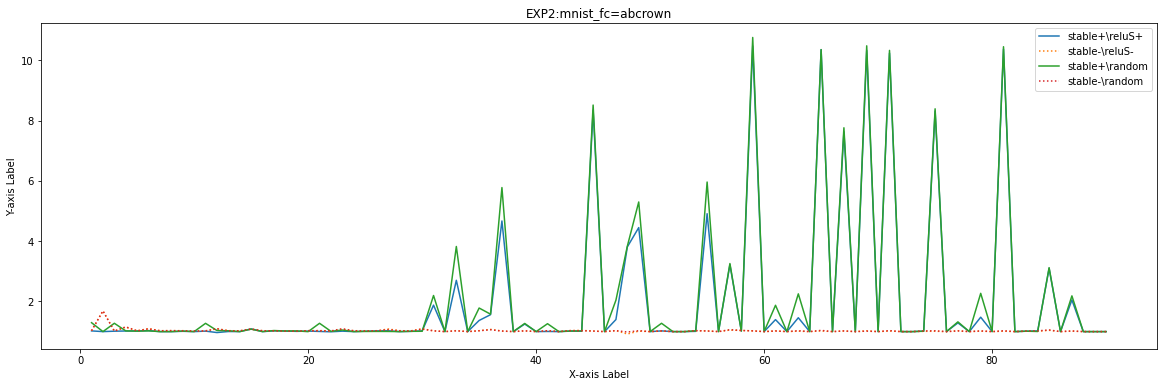

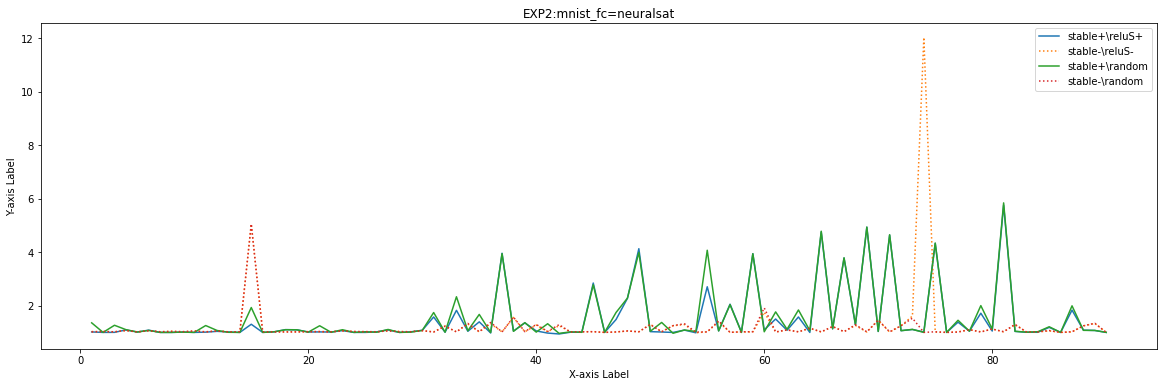

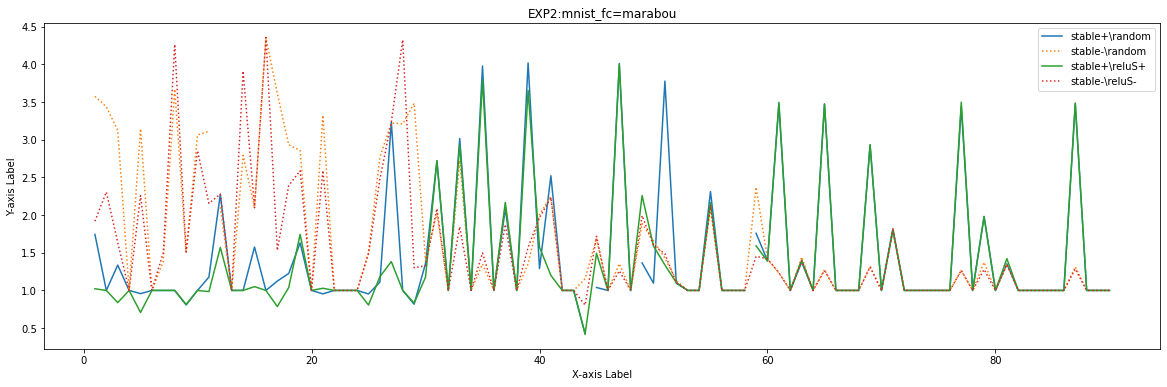

In [382]:
exp2_graphing(mnistfc_abcrown)
exp2_graphing(mnistfc_nsat)
exp2_graphing(mnistfc_marabou)

190.10471337931222
191.31236482670067
187.49665135381082
187.54342936653498
191.323879160317
192.68687308205696
216.21161731720252
196.8532738625241
219.56464609832545
191.86691091770086
225.93085352491175
331.45244115036866
ResMismatch: Instance: ACASXU_run2a_5_7_batch_2000_converted, prop_1, 38, unsat, unsat, sat, 74.652, 93.221, 70.175
255.94852978551864
338.41418143501784
224.81760185143264


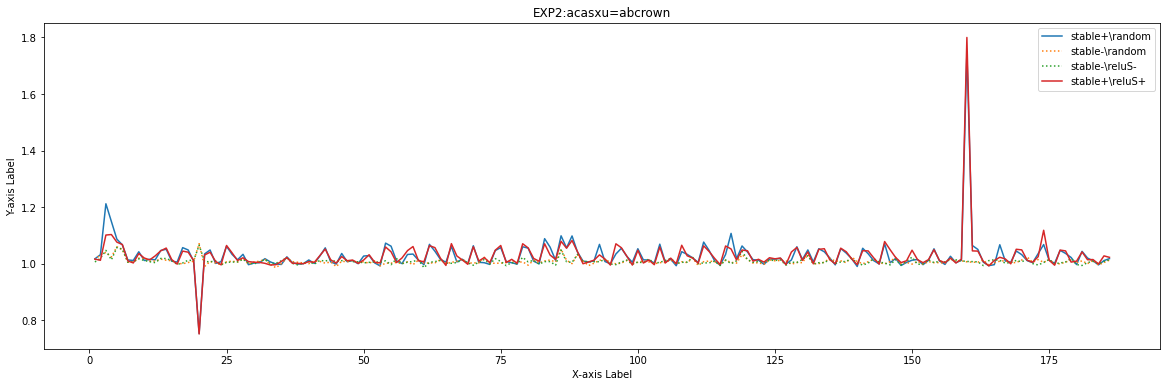

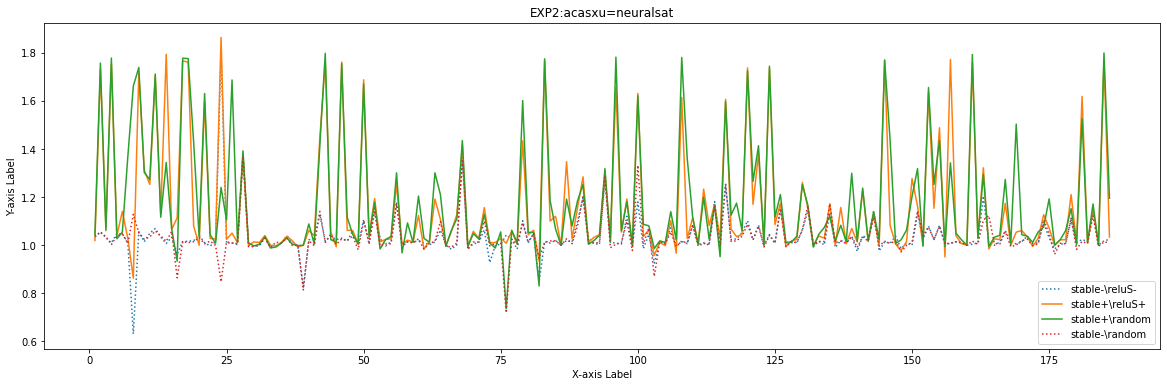

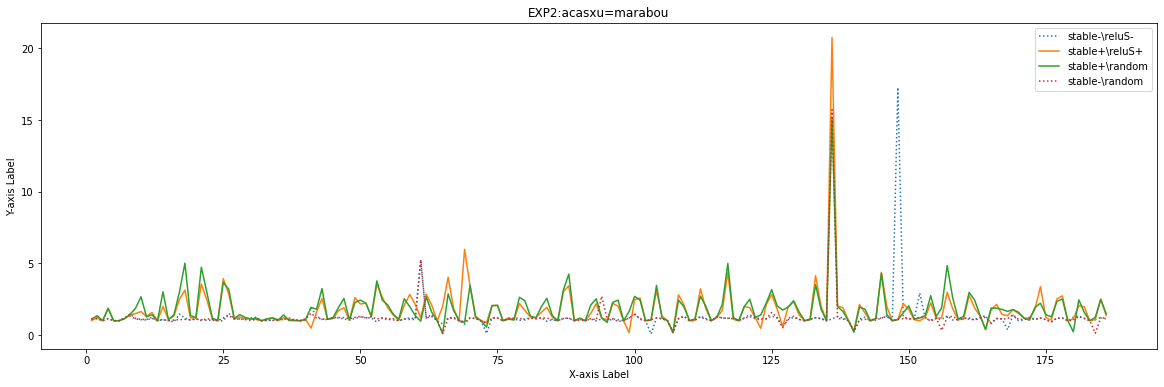

In [383]:
exp2_graphing(acasxu_abcrown)
exp2_graphing(acasxu_nsat)
exp2_graphing(acasxu_marabou)

55.32701865803711
51.85674252587316
60.777341969531584
55.38185886162569
51.70287154946129
48.64423947202829
46.14667070746502
52.80170671119666
48.534598858220015
45.92001409363987
41.1089127053462
48.006997485970736
41.53254232298273
39.49919159643848
46.24384721725534


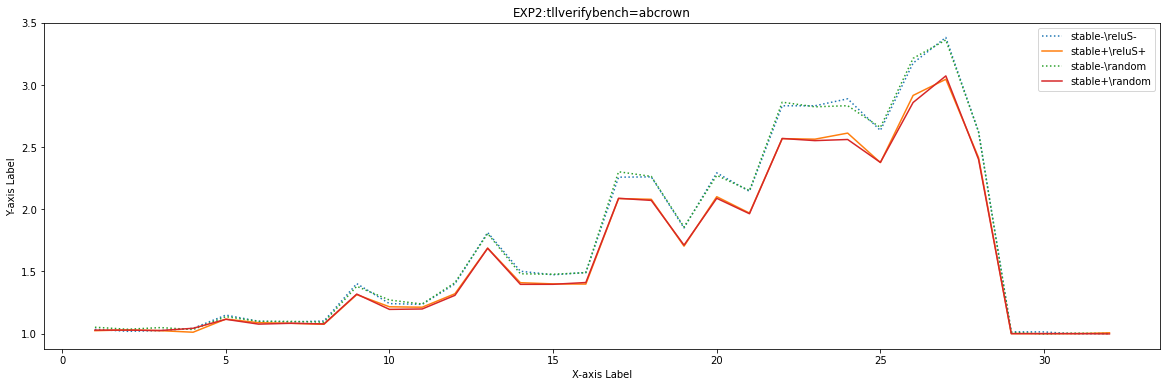

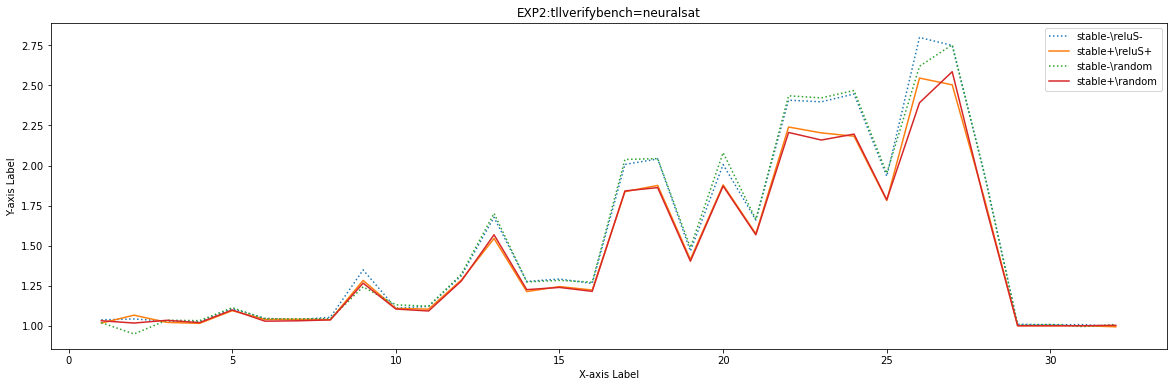

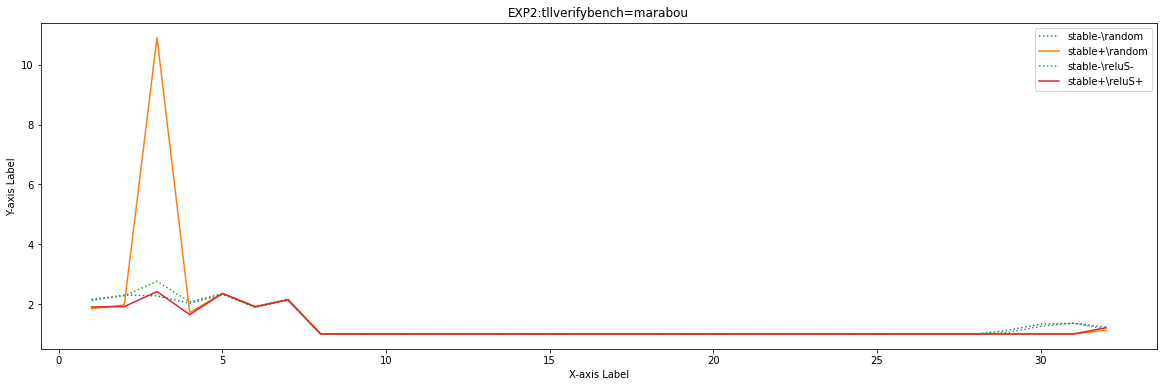

In [384]:
exp2_graphing(tll_abcrown)
exp2_graphing(tll_nsat)
exp2_graphing(tll_marabou)